## 1) Import the required libraries and read the dataset.

In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Reading the data from csv file
fifa_df_original = pd.read_csv('fifa.csv')

## 2) Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
# First 5 rows of the dataframe
fifa_df_original.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Copying the original data frame to fifa_df

In [4]:
# Copying the original dataframe into another dataframe for performing different operations
fifa_df = fifa_df_original.copy()

1) Checking first 5 Record in the data file we can also use sample function to check random records

In [5]:
# First 5 rows of the given dataset
fifa_df.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
# 5 Random samples from the given dataset
fifa_df.sample(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
16879,246179,D. van Kaam,18,https://cdn.sofifa.org/players/4/19/246179.png,Netherlands,https://cdn.sofifa.org/flags/34.png,56,75,FC Groningen,https://cdn.sofifa.org/teams/2/light/1915.png,...,63.0,38.0,45.0,58.0,6.0,14.0,12.0,7.0,14.0,€394K
10687,183228,B. Augustyn,30,https://cdn.sofifa.org/players/4/19/183228.png,Poland,https://cdn.sofifa.org/flags/37.png,65,65,Lechia Gdańsk,https://cdn.sofifa.org/teams/2/light/111091.png,...,65.0,54.0,64.0,62.0,16.0,12.0,6.0,6.0,16.0,€540K
4903,236836,O. Okwonkwo,20,https://cdn.sofifa.org/players/4/19/236836.png,Nigeria,https://cdn.sofifa.org/flags/133.png,70,85,Bologna,https://cdn.sofifa.org/teams/2/light/189.png,...,62.0,46.0,44.0,42.0,7.0,13.0,7.0,12.0,15.0,€9.1M
1762,215644,Burgui,24,https://cdn.sofifa.org/players/4/19/215644.png,Spain,https://cdn.sofifa.org/flags/45.png,75,78,Deportivo Alavés,https://cdn.sofifa.org/teams/2/light/463.png,...,69.0,59.0,28.0,21.0,6.0,8.0,10.0,12.0,10.0,€18.5M
7139,219522,J. Ledesma,25,https://cdn.sofifa.org/players/4/19/219522.png,Argentina,https://cdn.sofifa.org/flags/52.png,68,73,Rosario Central,https://cdn.sofifa.org/teams/2/light/110580.png,...,41.0,13.0,13.0,12.0,68.0,65.0,63.0,65.0,71.0,€1.3M


2) Checking the shape of the data frame

In [7]:
# Shape of the Dataset there are 18207 rows and 60 columns
fifa_df.shape

(18207, 60)

In [8]:
# Information about the dataset
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [9]:
# Percentage of null values in a specific column of the dataset
fifa_df.isnull().sum()/len(fifa_df) * 100

ID                           0.000000
Name                         0.000000
Age                          0.000000
Photo                        0.000000
Nationality                  0.000000
Flag                         0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Club Logo                    0.000000
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing   

In [10]:
## Checking the data for duplicate records
len(fifa_df[fifa_df.duplicated()])

0

## 3) Drop the columns which you think redundant for the analysis.

In [11]:
## Dropping Redundent columns and also Loaned From column from the data frame as it is having null value for 93% of records
fifa_df = fifa_df.drop(['ID','Loaned From', 'Photo', 'Club Logo', 'Flag'], axis=1)

In [12]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Nationality               18207 non-null  object 
 3   Overall                   18207 non-null  int64  
 4   Potential                 18207 non-null  int64  
 5   Club                      17966 non-null  object 
 6   Value                     18207 non-null  object 
 7   Wage                      18207 non-null  object 
 8   Preferred Foot            18159 non-null  object 
 9   International Reputation  18159 non-null  float64
 10  Weak Foot                 18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Work Rate                 18159 non-null  object 
 13  Body Type                 18159 non-null  object 
 14  Positi

In [13]:
# Shape of the dataframe after removing unwanted columns. Now there are 18207 rows and 55 columns
fifa_df.shape

(18207, 55)

## 4. Convert the columns "Value", "Wage", "Release Clause" to float datatype after getting rid of currency symbol and suffix. (6 points)
### - Note: When the record/entry has "M"(indicates millions) as suffix you need to multiply that value with 1000000
### - When the record/entry has "K"(indicates thousands) as suffix you need to multiply that value with 1000

In [14]:
selection = fifa_df[['Value','Wage','Release Clause']]
print(selection)

         Value   Wage Release Clause
0      €110.5M  €565K        €226.5M
1         €77M  €405K        €127.1M
2      €118.5M  €290K        €228.1M
3         €72M  €260K        €138.6M
4        €102M  €355K        €196.4M
...        ...    ...            ...
18202     €60K    €1K          €143K
18203     €60K    €1K          €113K
18204     €60K    €1K          €165K
18205     €60K    €1K          €143K
18206     €60K    €1K          €165K

[18207 rows x 3 columns]


In [15]:
#fifa_df['Value'] = fifa_df.Value.str.translate(str.maketrans({'K':'000','M':'000000'}))
fifa_df['Value'] = fifa_df['Value'].str.replace('€','')
fifa_df['Wage'] = fifa_df['Wage'].str.replace('€','')
fifa_df['Release Clause'] = fifa_df['Release Clause'].fillna('€0K')
fifa_df['Release Clause'] = fifa_df['Release Clause'].str.replace('€','')
fifa_df['Value'] = fifa_df['Value'].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval)
fifa_df['Wage'] = fifa_df['Wage'].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval)
fifa_df['Release Clause'] = fifa_df['Release Clause'].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval)

In [16]:
fifa_df[['Value','Wage','Release Clause']]

,Value,Wage,Release Clause
0,110500000.0,565000.0,226500000.0
1,77000000.0,405000.0,127100000.0
2,118500000.0,290000.0,228100000.0
3,72000000.0,260000.0,138600000.0
4,102000000.0,355000.0,196400000.0
...,...,...,...
18202,60000.0,1000.0,143000.0
18203,60000.0,1000.0,113000.0
18204,60000.0,1000.0,165000.0
18205,60000.0,1000.0,143000.0


## 5. Convert the column "Joined" into integer data type with keeping only the year. (2 points)

In [17]:
fifa_df['Joined']

0         Jul 1, 2004
1        Jul 10, 2018
2         Aug 3, 2017
3         Jul 1, 2011
4        Aug 30, 2015
             ...     
18202     May 3, 2017
18203    Mar 19, 2018
18204     Jul 1, 2017
18205    Apr 24, 2018
18206    Oct 30, 2018
Name: Joined, Length: 18207, dtype: object

In [18]:
fifa_df['Joined'] = fifa_df['Joined'].str.split(',', expand=True)[1]
fifa_df['Joined'] = pd.to_numeric(fifa_df['Joined'].str.strip())
fifa_df['Joined'] = pd.to_numeric(fifa_df['Joined'], errors='coerce').fillna(0).astype(int)
fifa_df['Joined'] 

0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 18207, dtype: int32

## 6. Convert the column "Contract Valid Until" to pandas datetime type. (2 points)

In [19]:
fifa_df['Contract Valid Until'] = pd.to_datetime(fifa_df['Contract Valid Until'])
fifa_df['Contract Valid Until'] 

0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]

## 7. The column 'Height' is in inches with a quotation mark, Convert to float with decimal points. (2 points)

In [20]:
fifa_df['Height'] = fifa_df['Height'].str.split("'", expand=True)[0] + '.' + fifa_df['Height'].str.split("'", expand=True)[1]
fifa_df['Height'] = pd.to_numeric(fifa_df['Height'])
fifa_df['Height']

0        5.70
1        6.20
2        5.90
3        6.40
4        5.11
         ... 
18202    5.90
18203    6.30
18204    5.80
18205    5.10
18206    5.10
Name: Height, Length: 18207, dtype: float64

## 8. The column "Weight" has the suffix as lbs, remove the suffix and convert to float. (2 points)

In [21]:
fifa_df['Weight'] = pd.to_numeric(fifa_df['Weight'].str.replace('lbs',''))
fifa_df['Weight']

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

## 9. Check for the percentage of missing values and impute them with appropriate imputation techniques. (4 points)

In [22]:
fifa_df.isnull().sum()/len(fifa_df) * 100

Name                        0.000000
Age                         0.000000
Nationality                 0.000000
Overall                     0.000000
Potential                   0.000000
Club                        1.323667
Value                       0.000000
Wage                        0.000000
Preferred Foot              0.263635
International Reputation    0.263635
Weak Foot                   0.263635
Skill Moves                 0.263635
Work Rate                   0.263635
Body Type                   0.263635
Position                    0.329544
Jersey Number               0.329544
Joined                      0.000000
Contract Valid Until        1.587302
Height                      0.263635
Weight                      0.263635
Crossing                    0.263635
Finishing                   0.263635
HeadingAccuracy             0.263635
ShortPassing                0.263635
Volleys                     0.263635
Dribbling                   0.263635
Curve                       0.263635
F

In [23]:
for col in ['Preferred Foot','International Reputation','Weak Foot','Skill Moves','Work Rate','Body Type','Position','Jersey Number','Contract Valid Until','Height','Weight'
,'Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed'
,'Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking'
,'StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']:
    fifa_df[col].fillna(fifa_df[col].mode()[0], inplace=True)

In [24]:
fifa_df['Club'].fillna("No Club", inplace = True)
fifa_df

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,60000.0,1000.0,Right,1.0,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000.0,1000.0,Right,1.0,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
18204,B. Worman,16,England,47,67,Cambridge United,60000.0,1000.0,Right,1.0,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60000.0,1000.0,Right,1.0,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0


In [25]:
fifa_df.isnull().sum()/len(fifa_df) * 100

Name                        0.0
Age                         0.0
Nationality                 0.0
Overall                     0.0
Potential                   0.0
Club                        0.0
Value                       0.0
Wage                        0.0
Preferred Foot              0.0
International Reputation    0.0
Weak Foot                   0.0
Skill Moves                 0.0
Work Rate                   0.0
Body Type                   0.0
Position                    0.0
Jersey Number               0.0
Joined                      0.0
Contract Valid Until        0.0
Height                      0.0
Weight                      0.0
Crossing                    0.0
Finishing                   0.0
HeadingAccuracy             0.0
ShortPassing                0.0
Volleys                     0.0
Dribbling                   0.0
Curve                       0.0
FKAccuracy                  0.0
LongPassing                 0.0
BallControl                 0.0
Acceleration                0.0
SprintSp

## 10. Plot the distribution of Overall rating for all the players and write your findings. (2 points)

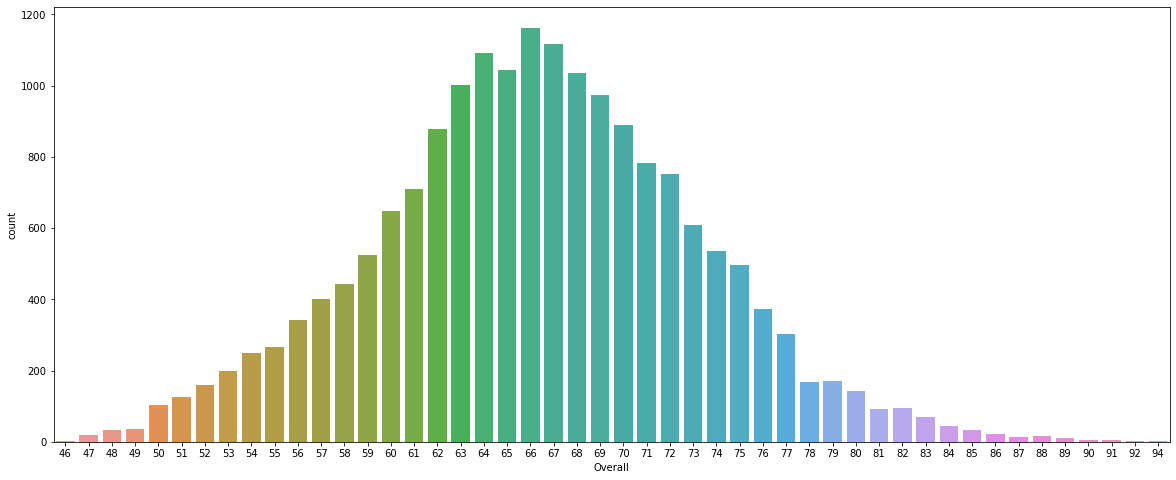

Mean:  66.23869940132916


In [26]:
plt.figure(figsize=(20,8))
sns.countplot(fifa_df['Overall'])
plt.show()
print('Mean: ',fifa_df['Overall'].mean())

## 11. Retrieve the names of top20 players based on the Overall rating. (2 points)

Minimum Rating is 46 and maximum is 94 <br>
Maximum number of players has rating of 66

In [27]:
top_20_names = fifa_df[['Name','Overall']].sort_values(by = 'Overall', ascending = False).head(20).reset_index ()
top_20_names

,index,Name,Overall
0,0,L. Messi,94
1,1,Cristiano Ronaldo,94
2,2,Neymar Jr,92
3,3,De Gea,91
4,4,K. De Bruyne,91
5,5,E. Hazard,91
6,6,L. Modrić,91
7,7,L. Suárez,91
8,8,Sergio Ramos,91
9,12,D. Godín,90


## 12. Generate a dataframe which should include all the information of the Top 20 players based on the Overall rating. (4 points)

In [28]:
top_20_players_dtls = fifa_df.sort_values(by = 'Overall', ascending = False).head(20).reset_index()
top_20_players_dtls

,index,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
5,5,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,6,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
7,7,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
8,8,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
9,12,D. Godín,32,Uruguay,90,90,Atlético Madrid,44000000.0,125000.0,Right,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90200000.0


## 13. What is the average "Age" and "Wage" of these top 20 players? (use the data frame created in the question 11) (2 points)

In [29]:
avg_age = top_20_players_dtls['Age'].mean()
avg_wage = top_20_players_dtls['Wage'].mean()

print('Average Age of Top 20 Players is: ',avg_age)
print('Average Wage of Top 20 Players is: ',avg_wage)

Average Age of Top 20 Players is:  29.55
Average Wage of Top 20 Players is:  294950.0


## 14. Among the top 20 players based on the Overall rating, which player has the highest wage? Display the name of the player with his wage. (2 points)

In [30]:
max_wage = top_20_players_dtls['Wage'].max()
print('Maximum Wage is: ',max_wage)
max_wage_player = top_20_players_dtls.loc[top_20_players_dtls['Wage'] == max_wage, 'Name']
print('Player Name: ',max_wage_player)

Maximum Wage is:  565000.0
Player Name:  0    L. Messi
Name: Name, dtype: object


## 15. Generate a dataframe which should include the "Player name", "Club Name", "Wage", and 'Overall rating'. (4 Points)
### - i) find the average Overall rating for each club.
### - ii) Display the average overall rating of Top10 Clubs using a plot

In [31]:
club_df = fifa_df[['Name','Club','Wage','Overall']]
club_df

,Name,Club,Wage,Overall
0,L. Messi,FC Barcelona,565000.0,94
1,Cristiano Ronaldo,Juventus,405000.0,94
2,Neymar Jr,Paris Saint-Germain,290000.0,92
3,De Gea,Manchester United,260000.0,91
4,K. De Bruyne,Manchester City,355000.0,91
...,...,...,...,...
18202,J. Lundstram,Crewe Alexandra,1000.0,47
18203,N. Christoffersson,Trelleborgs FF,1000.0,47
18204,B. Worman,Cambridge United,1000.0,47
18205,D. Walker-Rice,Tranmere Rovers,1000.0,47


In [32]:
# Get count of unique clubs in the dataset
distinct_clubs = len(pd.unique(fifa_df['Club']))
print('Count of Clubs: ',distinct_clubs)
club_df.groupby('Club', as_index=False)['Overall'].mean()

Count of Clubs:  652


,Club,Overall
0,SSV Jahn Regensburg,65.586207
1,1. FC Heidenheim 1846,65.750000
2,1. FC Kaiserslautern,63.384615
3,1. FC Köln,70.785714
4,1. FC Magdeburg,65.615385
...,...,...
647,Zagłębie Sosnowiec,60.760000
648,Çaykur Rizespor,66.900000
649,Örebro SK,60.481481
650,Östersunds FK,63.545455


## 16. What is the relationship between age and individual potential of the player? Visualize the relationship with appropriate plot and Comment on the same. (2 points)

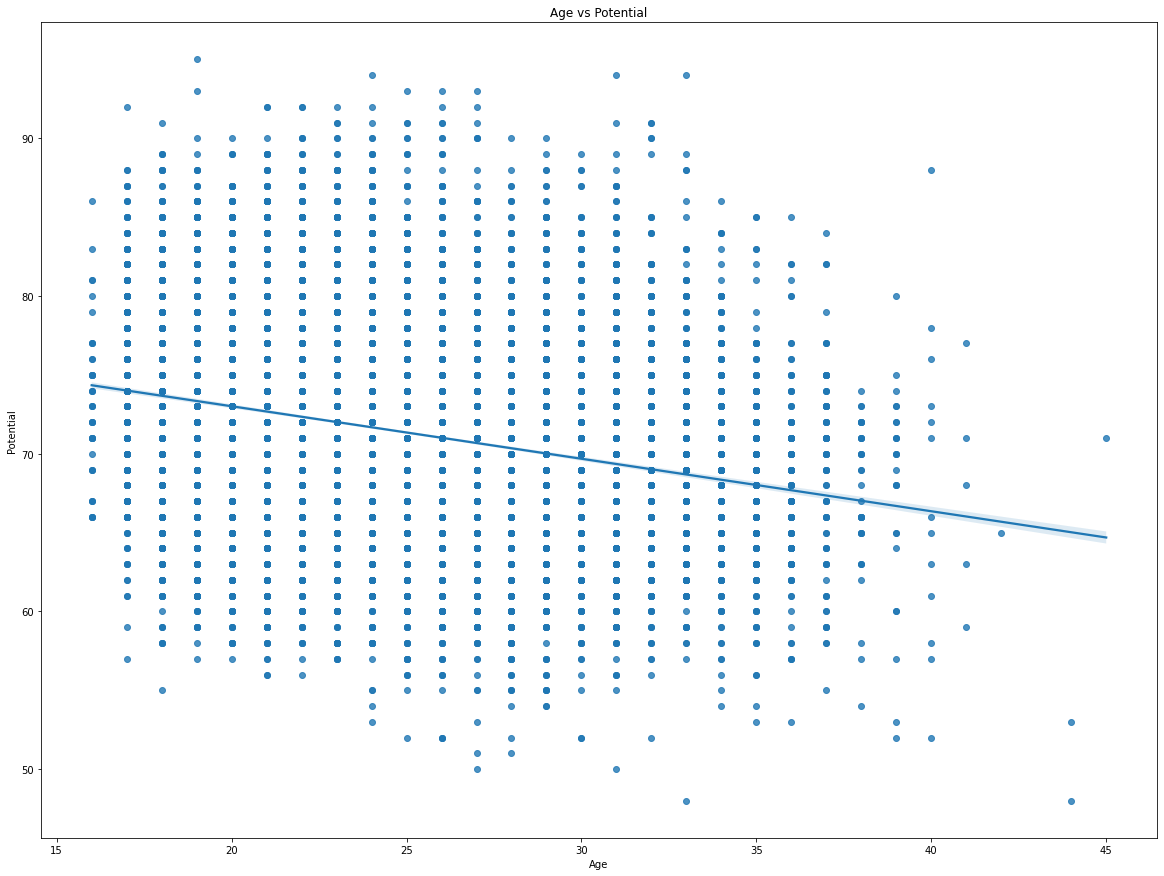

In [33]:
plt.figure(figsize=(20, 15))
sns.regplot(fifa_df['Age'] , fifa_df['Potential'])
plt.title('Age vs Potential')
plt.show()

Individual Potential of a Player decreases with Age

## 17. Which features directly contribute to the wages of the players? Support your answer with a plot and a metric. (2 points) (hint: use potential, Overall, value, international reputation, and Release Clause)

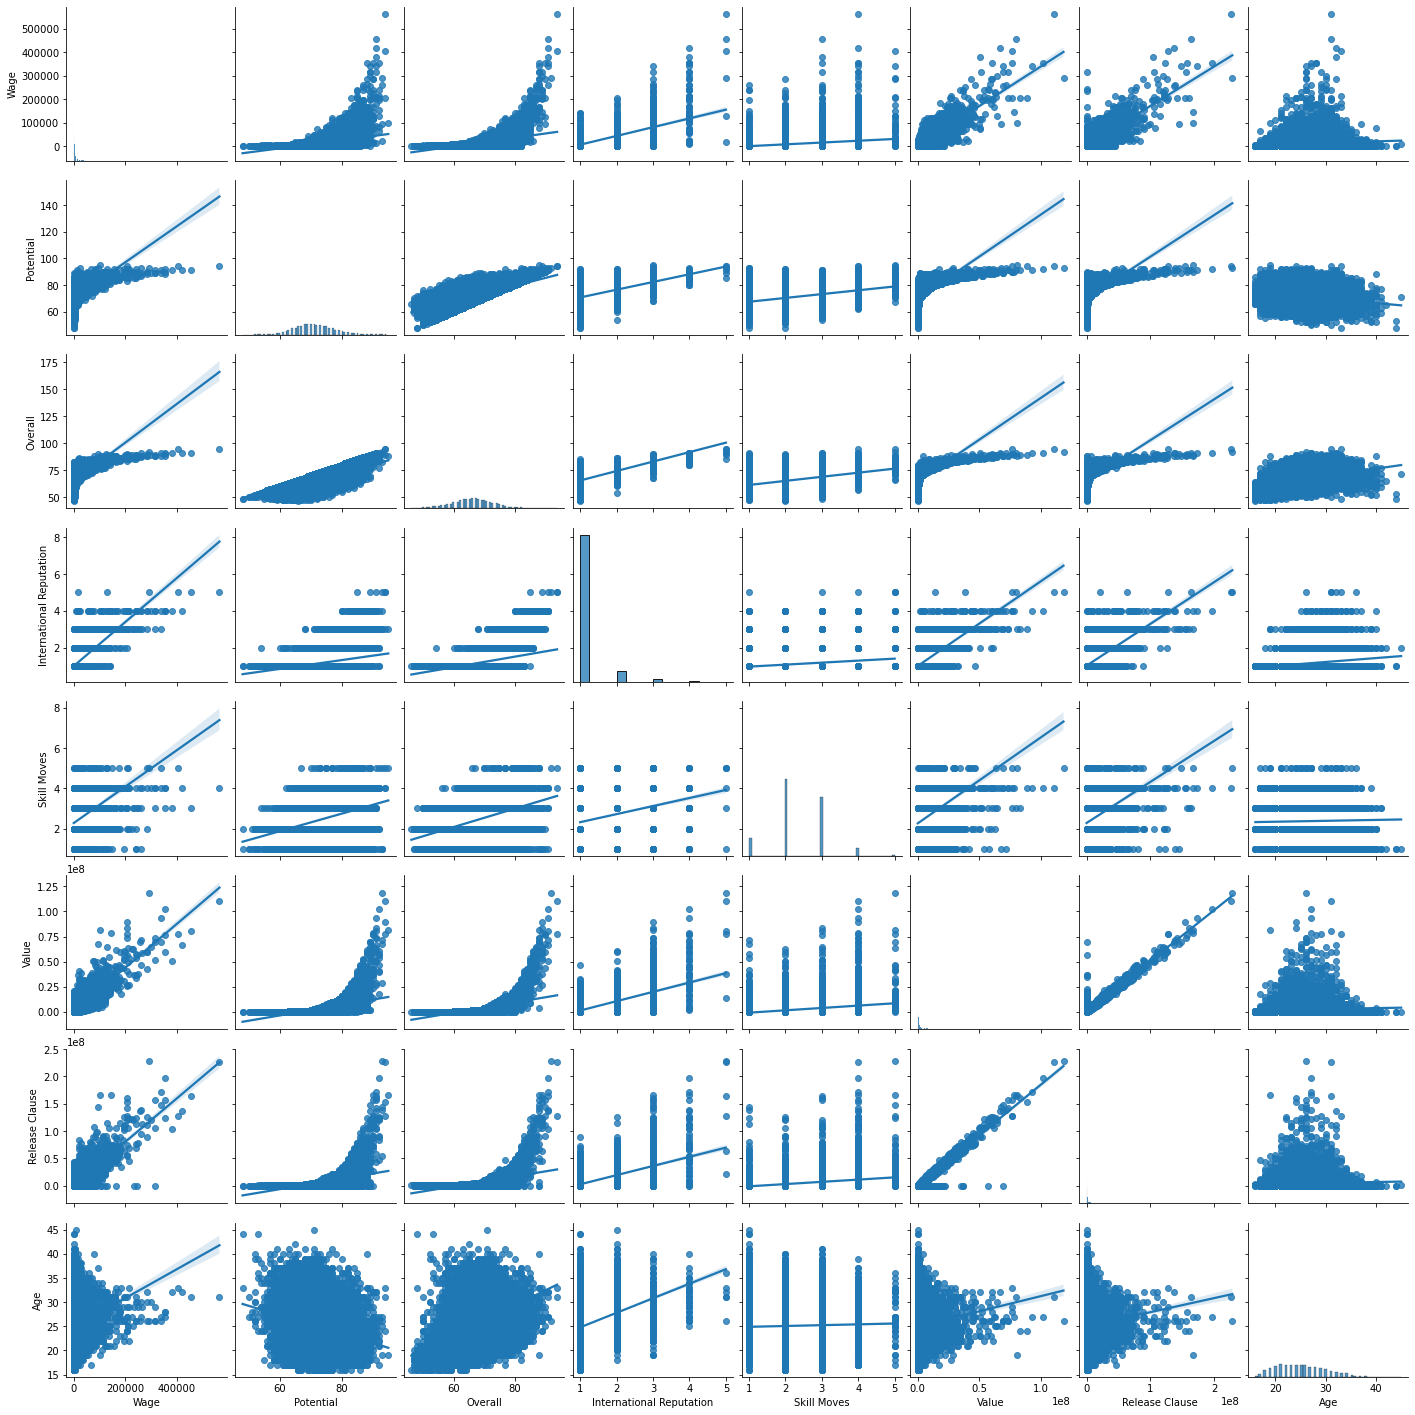

In [34]:
df_pairplot = fifa_df[['Wage','Potential','Overall','International Reputation','Skill Moves','Work Rate','Value','Release Clause','Age']]
sns.pairplot(df_pairplot, kind='reg')

plt.show()

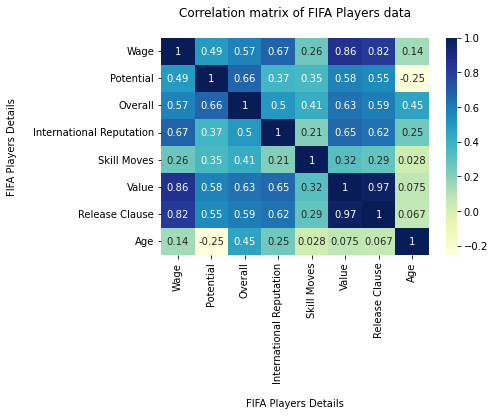

In [35]:
hm = sns.heatmap(df_pairplot.corr(), cmap="YlGnBu", annot=True)

hm.set(xlabel='\nFIFA Players Details', ylabel='FIFA Players Details\n', title = "Correlation matrix of FIFA Players data\n")

plt.show()

* Age has least correlation with players wage<br>
* Current Value and Release Clause of a player influence the wage of the player by 80-90%
* Players with good Potential, Overall rating and international reputation gets better wage

## 19. How many players are from the club 'Juventus' and the wage is greater than 200K? Display all the information of such players. (2 points)

In [36]:
wage_200_above_df = fifa_df[fifa_df['Wage'] > 200000]
wage_200_above_df[wage_200_above_df['Club'] == 'Juventus']

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
15,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,Left,3.0,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
24,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,4.0,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0


## 20. Generate a data frame containing top 5 players by Overall rating for each unique position. (2 Points)

In [37]:
# Get count of unique positions in the dataset
distinct_positions = len(pd.unique(fifa_df['Position']))
print('Count of distinct positions: ',distinct_positions)
print('Data Frame row count: ',distinct_positions * 5)
sorted_df = fifa_df.sort_values(by = 'Overall', ascending = False).groupby('Position').head(5)
sorted_df = sorted_df.sort_values(by = ['Position','Overall'], ascending = [True,False]).reset_index(drop=True)
sorted_df[['Position','Name','Overall']]

Count of distinct positions:  27
Data Frame row count:  135


,Position,Name,Overall
0,CAM,A. Griezmann,89
1,CAM,C. Eriksen,88
2,CAM,M. Özil,86
3,CAM,T. Müller,86
4,CAM,Roberto Firmino,86
...,...,...,...
130,ST,Cristiano Ronaldo,94
131,ST,R. Lewandowski,90
132,ST,S. Agüero,89
133,ST,H. Kane,89


## 21. What is the average wage one can expect to pay for the top 5 players in every position? (use the data frame created in Q20) (2 points)

In [38]:
sorted_df[['Position','Wage']].groupby('Position').mean('Wage')

,Wage
Position,
CAM,174000.0
CB,124800.0
CDM,199200.0
CF,47400.0
CM,130600.0
GK,192800.0
LAM,81600.0
LB,177200.0
LCB,162000.0
